# List of Updates (Miguel Martínez -- March 3, 2020)

## minor corrections
* 'In this assignment we show you how to compute the word embeddings.' -> 'In this assignment we will show you how to compute word embeddings.'
* 'in natural language processing ...' --> 'Natural Language Processing (NLP)...'
* 'number of positive words and negative words' --> ' number of positive and negative words'
* 'Understand how the backpropagation works.' --> 'Understand how backpropagation works.'
* 'Once you have encoded the all the context words ...' --> 'Once you have encoded all the context words ...'
*  '...the context words in $\bar x$, you can use...' --> '...the context words, you can use $\bar x$ ...'
* minor formatting improvements througout the notebook

## other changes

* Added comments to code:
    - \# Import Python libraries and helper functions (in utils2)
    - \# Load, tokenize and process the data
    - \# print data sample
    - \# Compute the frequency distribution of the words in the dataset (vocabulary)
    - \# print the 20 most frequent words and their freq.
    - \# get_dict creates two dictionaries, converting words to indices and viceversa.
    - \# example of word to index mapping
    - \# Test your function example.


* Initializing your model: The paragraph did not mention that we are initializing bias vectors too. I have reworded the whole paragraph -- now it also references to figure 1.
* Added expected output to the first graded function evaluation.
* Included Relu function in the instructions for the forward prop. graded function.
* For the cross-entropy it said 'we have implemented the cost function for you'. But it also says that it is a graded function. I have ammended this assuming it is not a graded function (because there was not enough information as to how to perform the regularization with C for example).
* In the cross-entropy function, I was getting an error because logsumexp has been moved from scipy.misc to scipy.special. I have included an exception so that it can handle both cases.
* 'You created a function for the forward propagation and one for computing the gradients:' --> The gradients have not yet been computed (rephrased now).
* I have removed the cell with word2Ind['.'] after the backprop function, as it is not needed.
* There was some potential confusion with the function compute_gradients. In the backprop functions we did compute the gradients to backpropagate. In the compute_gradients function we are applying the gradient descent algorithm. I have renamed *compute_gradients* to *gradient_descent*. I have also added comments before the function (and hints).
* The number of iterations of gradient descent has been reduced to 15, since anyway the error did not decrease much (to avoid flooding the display).
* It was not clear why ```print("Number of occurrences: ", fdist['king'],fdist['queen'],fdist['man'],fdist['woman'] )``` was needed at that stage. So I have replaced that line of code with the typical 'expected output' comment.
* The two figures in section 3.0 were of very poor resolution. I have ammended that with: ```%config InlineBackend.figure_format = 'svg'```


## suggestions (things to look at which I did not change)

* I may be wrong...but: in the first paragraph we mention that we are going to compute word embeddings. Then we just use one-hot vectors (and averages of one-hot vectors). So it seems more that what we do is to use word embeddings (one-hot vectors) to predict target words? I did not want to modify this because maybe it is my own misunderstanding.
* Also, in the first paragraphs it is mentioned that we will use 'slightly pre-trained vectors', but it did not see these, since the ANN is initialized by randomization. 
* Some comments are needed on the regularization parameter C.
* Why do the word embeddings come given by: embs = (W1.T + W2)/2.0. I don't think there is any explanation about it in the video lectures or in the assignment. I did not fix this because I do not understand it myself. My belief was that word embeddings are the vector representations of the words. But from the beginning of the assignment we assumed that these are one-hot encodings. What does it mean to do the average of two layers in an ANN?

# Assignment 4: Word Embeddings 

Welcome to the fourth programming assignment of Course 2. In this assignment we will show you how to compute the word embeddings. In Natural Language Processing (NLP) we can not only rely on counting the number of positive words and negative words, as we did in the last course using logistic regression. Instead we will try to find a way to represent each word by a vector. The vector could then represent syntactic (i.e. parts of speech) and semantic (i.e. meaning) structures. In this assignment you will explore a classic way of learning embeddings, or representations, of words by using a famous model called the continuous bag of words (CBOW) model. By completing this assignment you will:

- Train word vectors from scratch.
- Learn how to create batches of data.
- Understand how backpropagation works.
- Plot and visualize your learned word vectors.

Because it will take a while to train your CBOW model, you will code the model and make sure to get the expected outputs. We will give you some slightly pre-trained vectors and then you will fine tune them on the Shakespeare dataset. 

Knowing how to train these models will give you a better understanding of word vectors, which are building blocks to many applications in natural language processing.


# 1.0 The Continuous bag of words model

Let's take a look at the following sentence: **'I am happy because I am learning'**. In continuous bag of words modeling we try to predict the center word given a few context words. For example, if you were to choose a context (say $C = 2$), then you would try to predict the word **happy** given the context: {I, am, because, I}. In other words, you have

$$context = [I,am, because, I]$$
$$target = happy$$

The structure of your model will look like this:


<div style="width:image width px; font-size:100%; text-align:center;"><img src='word2.png' alt="alternate text" width="width" height="height" style="width:600px;height:250px;" /> Figure 1 </div>

Where $\bar x$ is the average one hot vector for all the context word encodings. 

<div style="width:image width px; font-size:100%; text-align:center;"><img src='mean_vec2.png' alt="alternate text" width="width" height="height" style="width:600px;height:250px;" /> Figure 2 </div>

Once you have encoded all the context words, you can use $\bar x$ as the input to your model. The architecture you will be implementing is as follows:

\begin{align}
 h &= W_1 \  X + b_1  \tag{1} \\
 a &= ReLU(h)  \tag{2} \\
 z &= W_2 \  a + b_2   \tag{3} \\
 \hat y &= softmax(z)   \tag{4} \\
\end{align}

In [1]:
# Import Python libraries and helper functions (in utils2) 
import nltk
from nltk.tokenize import word_tokenize
import numpy as np
from collections import Counter
from utils2 import sigmoid, get_batches, compute_pca, get_dict

In [2]:
# Download sentence tokenizer
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
# Load, tokenize and process the data
import re                                                           #  Load the Regex-modul
data = open('shakespeare.txt').read()                               #  Read in the data
data = re.sub(r'[,!?;-]', '.',data)                                 #  Punktuations are replaced by .
data = nltk.word_tokenize(data)                                     #  Tokenize string to words
data = [ ch.lower() for ch in data if ch.isalpha() or ch == '.']    #  Lower case and drop non-alphabetical tokens
print("Number of tokens:", len(data),'\n', data[:15])               #  print data sample

Number of tokens: 60975 
 ['o', 'for', 'a', 'muse', 'of', 'fire', '.', 'that', 'would', 'ascend', 'the', 'brightest', 'heaven', 'of', 'invention']


In [4]:
# Compute the frequency distribution of the words in the dataset (vocabulary)
fdist = nltk.FreqDist(word for word in data)
print("Size of vocabulary: ",len(fdist) )
print("Most frequent tokens: ",fdist.most_common(20) ) # print the 20 most frequent words and their freq.

Size of vocabulary:  5777
Most frequent tokens:  [('.', 9630), ('the', 1521), ('and', 1394), ('i', 1257), ('to', 1159), ('of', 1093), ('my', 857), ('that', 781), ('in', 770), ('a', 752), ('you', 748), ('is', 630), ('not', 559), ('for', 467), ('it', 460), ('with', 441), ('his', 434), ('but', 417), ('me', 417), ('your', 397)]


#### Mapping words to indices and indices to words
We provide a helper function to create a dictionary that maps words to indices and indices to words.

In [5]:
# get_dict creates two dictionaries, converting words to indices and viceversa.
word2Ind, Ind2word = get_dict(data)
V = len(word2Ind)
print("Size of vocabulary: ", V)

Size of vocabulary:  5777


In [6]:
# example of word to index mapping
print("Index of the word 'king' :  ",word2Ind['king'] )
print("Word which has index 2743:  ",Ind2word[2743] )

Index of the word 'king' :   2744
Word which has index 2743:   kinds


# 2.0 Training the Model

###  Initializing the model

You will now initialize two matrices and two vectors. <br> The first matrix ($W_1$) is of dimension $V \times N$, where $V$ is the number of words in your vocabulary and $N$ is the dimension of your word vector. <br>
The second matrix ($W_2$) is of dimension $N \times V$. 
The two vectors, $b_1$ and $b_2$ are of dimension $N\times 1$ and $V\times 1$ respectively (column vectors). $b_1$ and $b_2$ are the bias vectors of the linear layers from matrices $W_1$ and $W_2$.
The overall structure of the model will look as in Figure 1, but at this stage we are just initializing the parameters. 

**Note:** In the next cell you will encounter a random seed. Please **DO NOT** modify this seed so your solution can be tested correctly.


In [7]:
np.random.seed(1)
# UNIT TEST COMMENT: Candidate for Table Driven Tests
# GRADED FUNCTION: initialize_model
def initialize_model(N,V):
    W1 = np.random.rand(N,V)
    W2 = np.random.rand(V,N)
    b1 = np.random.rand(N,1)
    b2 = np.random.rand(V,1)
    
#   CODE REVIEW COMMENT: there are many ways of randomnly initializing matrixes in numpy.
#   Maybe it should be specified that the preferred method is to draw samples 
#   from a uniform distribution over [0,1) to avoid other types of initialization. 

#   UNIT TEST COMMENT: The following 2 examples are equivalent to the current solution:
#   W1 = np.random.random((N,V))
#   W2 = np.random.random((V,N))
#   b1 = np.random.random((N,1))
#   b2 = np.random.random((V,1))
    
#   W1 = np.random.random_sample((N,V))
#   W2 = np.random.random_sample((V,N))
#   b1 = np.random.random_sample((N,1))
#   b2 = np.random.random_sample((V,1))

    return W1, W2, b1, b2

In [8]:
# Test your function example.
N = 4
V = 10
W1, W2, b1, b2 = initialize_model(N,V)
assert W1.shape == ((N,V))
assert W2.shape == ((V,N))
print(W1.shape, W2.shape, b1.T)

(4, 10) (10, 4) [[0.88330609 0.62367221 0.75094243 0.34889834]]


* **Expected Output:**  (4, 10) (10, 4) [[0.88330609 0.62367221 0.75094243 0.34889834]]

### Softmax
Before we can start training the model, we need to implement the softmax function as defined in equation 5:  

<br>
$$ \text{softmax}(z_i) = \frac{e^{z_i} }{\sum_{i} e^{z_i} }  \tag{5} $$


**Instructions**: Implement the softmax function below. 

In [9]:
# UNIT TEST COMMENT: Candidate for Table Driven Tests
# GRADED FUNCTION: softmax
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    return (np.exp(x) / np.sum(np.exp(x), axis=0)).T

In [10]:
# testing the softmax function 
print(softmax([0,3,-2])) 

[0.04712342 0.94649912 0.00637746]


**Expected Ouput:**  array([0.04712342, 0.94649912, 0.00637746])

### Forward propagation

Implement the forward propagation $z$ according to equations (1) to (3). <br>
For that, you will use as activation the Rectified Linear Unit (ReLU) given by:

$$f(h)=\max (0,h) \tag{6}$$

In [11]:
# UNIT TEST COMMENT: Candidate for Table Driven Tests
# GRADED FUNCTION: forward_prop
def forward_prop(x, W1, W2, b1, b2):
    '''
    Inputs: 
        x:  average one hot vector for the context 
        W1, W2, b1, b2:  matrices and biases to be learned
     Outputs: 
        z:  output score vector
    '''
    h = np.dot(W1,x) + b1
#   UNIT TEST COMMENT: Can be rewritten using the following 2 alternatives:
#   h = np.tensordot(W1, x, 1) + b1
#   h = np.matmul(W1, x) + b1
    
    h[h<=0.0] = 0.0                     # this is the ReLU function
#   UNIT TEST COMMENT: There are many ways to write the ReLU func. Here are 4 alternatives:
#   h = np.maximum(h, 0)
#   np.maximum(h, 0, h)
#   h = h * (h > 0)
#   h = (abs(h) + h)/2
    z = np.dot(W2, h) + b2
#   UNIT TEST COMMENT: Can be rewritten using the following 2 alternatives:
#   z = np.tensordot(W2, h, 1) + b2
#   z = np.matmul(W2, h) + b2

#   UNIT TEST COMMENT: h and z must be column vector for the solution to be right
    h = h.T
    z = z.T

    return z, h
#   UNIT TEST COMMENT: solutions missing the transpose operation should be considered wrong

## Cost function

We have implemented the *cross-entropy* cost function for you. <br>
If you want to understand it better, we refer to a [good explanation](https://cs224d.stanford.edu/lecture_notes/notes1.pdf).

In [12]:
try:
    from scipy.misc import logsumexp
except ImportError:
    from scipy.special import logsumexp

# compute_cost: cross-entropy cost function,
def compute_cost(z, C, y, yhat, batch_size):
    z_hat = logsumexp(z, axis=-1, keepdims=True)                      
    cost = (-np.sum(y*np.log(yhat)) + np.sum(2.0*C*z_hat)) / batch_size
    return cost

##  Training the Model

Now that you have understood how the CBOW model works, you will train it. <br>
You created a function for the forward propagation. Now you will implement a function that computes the gradients to backpropagate the errors.

In [13]:
# UNIT TEST COMMENT: Candidate for Table Driven Tests
# GRADED FUNCTION: back_prop
def back_prop(x, z, y, h, W1, W2, b1, b2, batch_size, m):
    '''
    Inputs: 
        x:  average one hot vector for the context 
        z:  score vector
        y:  target vector
        h:  hidden vector (see eq. 1)
        W1, W2, b1, b2:  matrices and biases  
        batch_size: batch size 
        m:  number of context words
     Outputs: 
        grad_W1, grad_W2, grad_b1, grad_b2:  gradients of matrices and biases   
    '''
    l1 = np.dot(W2.T, (z - y))
#   UNIT TEST COMMENT: Can be rewritten using the following 2 alternatives:
#   l1 = np.tensordot(W2.T, (z - y), 1)
#   l1 = np.matmul(W2.T, (z - y))

    l1[l1<0] = 0.0
#   UNIT TEST COMMENT: There are many ways to write the ReLU func. Here are 4 alternatives:
#   l1 = np.maximum(l1, 0)
#   np.maximum(l1, 0, l1)
#   l1 = l1 * (l1 > 0)
#   l1 = (abs(l1) + l1)/2
    
    grad_W2 = (1.0/(batch_size*m)) * np.dot((z - y), h)
#   UNIT TEST COMMENT: Can be rewritten using the following 3 alternatives (or any combination of them):
#   grad_W2 = (1.0/(batch_size*m)) * np.tensordot((z - y), h, 1)
#   grad_W2 = (1.0/(batch_size*m)) * np.matmul((z - y), h)
#   grad_W2 = np.dot((1.0/(batch_size*m)), np.dot((z - y), h))

    grad_b2 = (1.0/(batch_size*m)) * np.sum((z - y), axis = 1, keepdims=True)
#   UNIT TEST COMMENT: Can be rewritten using the following 2 alternatives (or any combination of them):
#   grad_b2 = np.dot((1.0/(batch_size*m)), np.sum((z - y), axis = 1, keepdims=True))
#   grad_b2 = (1.0/(batch_size*m)) * (z - y).sum(axis = 1, keepdims=True)
    
    grad_b1 = (1.0/(batch_size*m)) * np.sum(l1, axis = 1, keepdims=True)
#   UNIT TEST COMMENT: Can be rewritten using the following 2 alternatives (or any combination of them):
#   grad_b1 = np.dot((1.0/(batch_size*m)), np.sum(l1, axis = 1, keepdims=True))
#   grad_b1 = (1.0/(batch_size*m)) * l1.sum(axis = 1, keepdims=True)

    grad_W1 = (1.0/(batch_size*m)) * np.dot(l1, x.T)
#   UNIT TEST COMMENT: Can be rewritten using the following 3 alternatives (or any combination of them):
#   grad_W1 = (1.0/(batch_size*m)) * np.tensordot(l1, x.T, 1)
#   grad_W1 = (1.0/(batch_size*m)) * np.matmul(l1, x.T)
#   grad_W1 = np.dot((1.0/(batch_size*m)), np.dot(l1, x.T))

    return grad_W1, grad_W2, grad_b1, grad_b2

Now that you have implemented a function to compute the gradients, you will implement batch gradient descent over your training set. 

**Hint:** For that, you will use initialize_model and the back_prop function that you just created (and the compute_cost function). You can also use the provided get_batches helper function:

```for x, y in get_batches(data, word2Ind, V, C, batch_size):```

```...```

Also: print the cost after each batch is processed (use batch size = 128)

In [14]:
# UNIT TEST COMMENT: Candidate for Table Driven Tests
# GRADED FUNCTION: gradient_descent
def gradient_descent(data, word2Ind, C, N, V, num_iters, alpha=0.03):
    
    '''
    This is the gradient_descent function
    
      Inputs: 
        data:      text
        word2Ind:  words to Indices
        C:         context window
        N:         dimension of hidden vector  
        V:         dimension of vocabulary 
        num_iters: number of iterations  
     Outputs: 
        W1, W2, b1, b2:  updated matrices and biases   

    '''
    W1, W2, b1, b2 = initialize_model(N,V) #W1=(N,V) and W2=(V,N)
    m = (2*C)
    batch_size = 128
#    batch_size = 512
    iters = 0
    for x, y in get_batches(data, word2Ind, V, C, batch_size):
        z, h = forward_prop(x, W1, W2, b1, b2)
        yhat = softmax(z)
        cost = compute_cost(z, C, y, yhat, batch_size)
        print('iters', iters + 1 , '   cost',cost)
        grad_W1, grad_W2, grad_b1, grad_b2 = back_prop(x, yhat, y, h, W1, W2, b1, b2, batch_size, m)
        W1 = W1 - alpha * grad_W1 
        W2 = W2 - alpha * grad_W2
        b1 = b1 - alpha * grad_b1 
        b2 = b2 - alpha * grad_b2
#       UNIT TEST COMMENT: np.dot can be used for scalar product as well
#       W1 = W1 - np.dot(alpha, grad_W1)
#       W2 = W2 - np.dot(alpha, grad_W2)
#       b1 = b1 - np.dot(alpha, grad_b1)
#       b2 = b2 - np.dot(alpha, grad_b2)
        iters +=1 
        if iters == num_iters: 
            break
        if iters % 100 == 0:
            alpha *= 0.66

    return W1, W2, b1, b2

In [15]:
# test your function
# UNIT TEST COMMENT: Each time this cell is run the cost for each iteration changes slightly (the change is less dramatic after some iterations)
# to have this into account let's accept an answer as correct if the cost of iter 15 = 41.6 (without caring about decimal points beyond the first decimal)
# 41.66, 41.69778, 41.63, etc should all be valid answers.
C = 2
N = 50
word2Ind, Ind2word = get_dict(data)
V = len(word2Ind)
num_iters = 15
W1, W2, b1, b2 = gradient_descent(data, word2Ind, C, N, V, num_iters)

iters 1    cost 141.394384981266
iters 2    cost 117.92341233614451
iters 3    cost 95.14592803335215
iters 4    cost 74.56901175464692
iters 5    cost 60.11053621683724
iters 6    cost 50.38225815337588
iters 7    cost 45.42162691992808
iters 8    cost 42.52556663695316
iters 9    cost 41.66220648759513
iters 10    cost 41.661976913880686
iters 11    cost 41.661747376305414
iters 12    cost 41.661517875141314
iters 13    cost 41.661288410662394
iters 14    cost 41.66105898314475
iters 15    cost 41.66082959286652


**Expected Output:** iters 15 cost 41.6

## 3.0 Visualizing the word vectors

In this part you will visualize the word vectors trained using the function you just coded above. 

In [16]:
# visualizing the word vectors here
from matplotlib import pyplot
%config InlineBackend.figure_format = 'svg'
words = ['king', 'queen','lord','man', 'woman','dog','horse',
         'rich','happy','sad']

embs = (W1.T + W2)/2.0
 
# given a list of words and the embeddings, it returns a matrix with all the embeddings
idx = [word2Ind[word] for word in words]
X = embs[idx, :]
print(X.shape, idx)  # X.shape:  Number of words of dimension N each 

(10, 50) [2744, 3950, 2960, 3022, 5674, 1452, 2472, 4190, 2316, 4277]


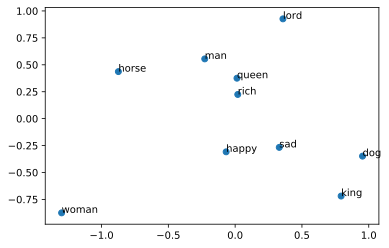

In [17]:
result= compute_pca(X, 2)
pyplot.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

We have to be careful with the interpretation of this projected word vectors, since the PCA depends on the projection -- as shown in the following illustration.

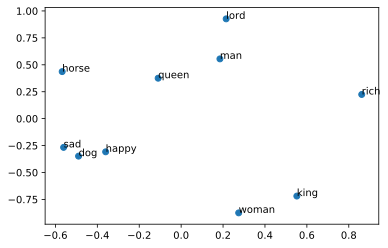

In [18]:
result= compute_pca(X, 4)
pyplot.scatter(result[:, 3], result[:, 1])
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 3], result[i, 1]))
pyplot.show()